In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [23]:
#symbols = ['AAPL','MSFT','GOOGL','TSLA']
symbols = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

In [24]:
new_stock_data = yf.download(symbols, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [25]:
print(new_stock_data.head(5))

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876122  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167610  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200


In [29]:
new_stock_data['Close_lag_1'] = new_stock_data['Close'].shift(1)
new_stock_data['Close_lag_2'] = new_stock_data['Close'].shift(2)
new_stock_data['Close_rolling_mean_5'] = new_stock_data['Close'].rolling(window=5).mean()
new_stock_data['Close_rolling_std_5'] = new_stock_data['Close'].rolling(window=5).std()

In [30]:
new_stock_data.dropna(inplace=True)

In [33]:
X = new_stock_data[['Open', 'High', 'Low', 'Volume', 'Close_lag_1', 'Close_lag_2', 'Close_rolling_mean_5', 'Close_rolling_std_5']]

In [34]:
X.head()


,Open,High,Low,Volume,Close_lag_1,Close_lag_2,Close_rolling_mean_5,Close_rolling_std_5
Date,,,,,,,,
2020-01-08,74.290001,76.110001,74.290001,132079200,74.597504,74.949997,74.958000,0.550490
2020-01-09,76.809998,77.607498,76.550003,170108400,75.797501,74.597504,75.422000,1.236827
2020-01-10,77.650002,78.167503,77.062500,140644800,77.407501,75.797501,76.067000,1.375992
2020-01-13,77.910004,79.267502,77.787498,121532000,77.582497,77.407501,76.925000,1.782752
2020-01-14,79.175003,79.392502,78.042503,161954400,79.239998,77.582497,77.639499,1.254298


In [35]:
y = new_stock_data['Close']

In [36]:
y

Date
2020-01-08     75.797501
2020-01-09     77.407501
2020-01-10     77.582497
2020-01-13     79.239998
2020-01-14     78.169998
                 ...    
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: Close, Length: 1002, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
X_train.shape, X_test.shape

((801, 8), (201, 8))

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.9576
- Mean Absolute Error: 0.7105
- R2 Score: 0.9990
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7670
- Mean Absolute Error: 0.6138
- R2 Score: 0.9950


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 21.6450
- Mean Absolute Error: 16.8255
- R2 Score: 0.4683
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 36.1009
- Mean Absolute Error: 33.7042
- R2 Score: -10.1161


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1851
- Mean Absolute Error: 6.9445
- R2 Score: 0.1152


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5172
- Mean Absolute Error: 0.3916
- R2 Scor

In [40]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.994982
4,XGBRegressor,0.466660
3,Random Forest Regressor,0.457808
2,Decision Tree,0.115202
1,K-Neighbors Regressor,-10.116137


In [41]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.50


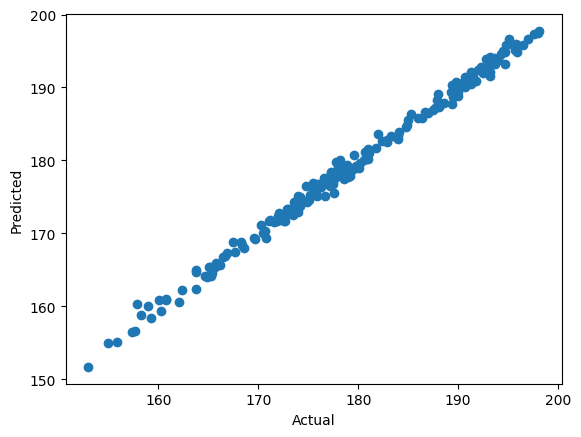

In [42]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [43]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
Date,,,
2023-03-15,152.990005,151.679459,1.310546
2023-03-16,155.850006,155.141358,0.708648
2023-03-17,155.000000,155.017250,-0.017250
2023-03-20,157.399994,156.497502,0.902492
2023-03-21,159.279999,158.400459,0.879540
...,...,...,...
2023-12-22,193.600006,193.652184,-0.052178
2023-12-26,193.050003,193.223396,-0.173393
2023-12-27,193.149994,192.164173,0.985821
